<a href="https://colab.research.google.com/github/zainnaved123/4375-ZN/blob/main/4375_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
pip install ucimlrepo

In [234]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
abalone = fetch_ucirepo(id=1)

In [235]:
X = abalone.data.features
y = abalone.data.targets

In [236]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [237]:
y.head()

,Rings
0,15
1,7
2,9
3,10
4,7


In [238]:
X.isna().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0


In [239]:
y.isna().sum()

,0
Rings,0


In [240]:
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)


# Check the updated dataset
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [241]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Sex_I           4177 non-null   bool   
 8   Sex_M           4177 non-null   bool   
dtypes: bool(2), float64(7)
memory usage: 236.7 KB


In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [243]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,1.453451,-0.759488


In [244]:
df = pd.concat([X, y], axis=1)

correlation_matrix = df.corr()

print(correlation_matrix['Rings'])

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Shucked_weight    0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
Sex_I            -0.436063
Sex_M             0.181831
Rings             1.000000
Name: Rings, dtype: float64


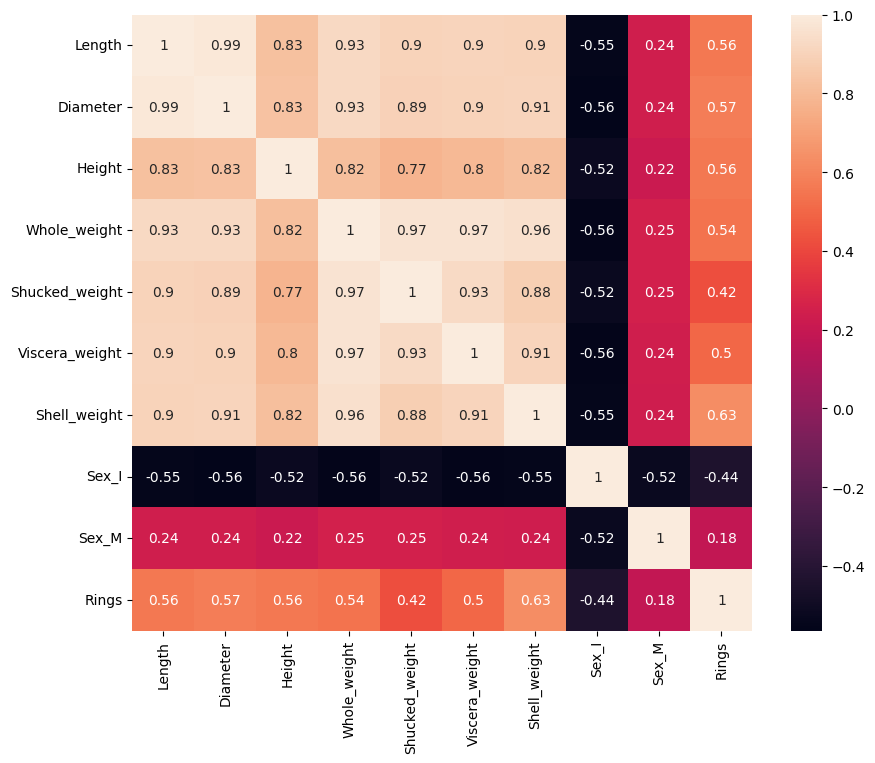

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [246]:
features = ['Shell_weight', 'Diameter', 'Length', 'Height']

In [247]:
X = X_scaled[features]

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

In [249]:
from sklearn.linear_model import SGDRegressor# numerical solution
sgd = SGDRegressor(max_iter=3000, tol=1e-3, learning_rate='constant',eta0=0.01)
sgd.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(learning_rate='constant', max_iter=3000)

In [250]:
sgd.coef_

array([ 1.63644884,  1.24606599, -1.45112996,  0.75625485])

In [251]:
sgd.intercept_

array([9.75998146])

In [252]:
sgd.score(X_test, y_test)

0.3748745124297991

In [253]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, mae, ev, r2

(6.450316657679332,
 1.8132858181005913,
 0.37819369275341586,
 0.3748745124297991)

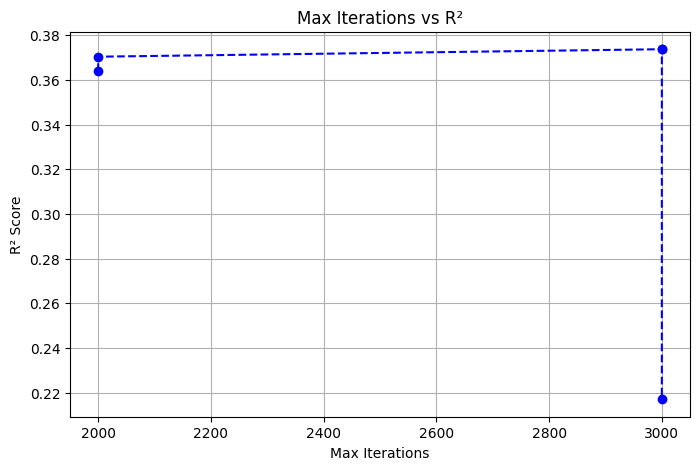

In [261]:
import matplotlib.pyplot as plt

# Data for max iterations and corresponding R² values
iterations = [2000, 2000, 3000, 3000, 3000]
r2_values_iterations = [
    0.3639965533816135,  # for tol = 1e-3
    0.3703767360102568,  # for learning rate = constant
    0.3737209494048839,  # for learning rate = constant, max_iter=3000
    0.3737209494048839,  # for learning rate = invscaling
    0.21705701253414522  # for tol = 1e-4
]

# Plot: Max Iterations vs R²
plt.figure(figsize=(8, 5))
plt.plot(iterations, r2_values_iterations, marker='o', linestyle='--', color='b')
plt.xlabel('Max Iterations')
plt.ylabel('R² Score')
plt.title('Max Iterations vs R²')
plt.grid(True)
plt.show()

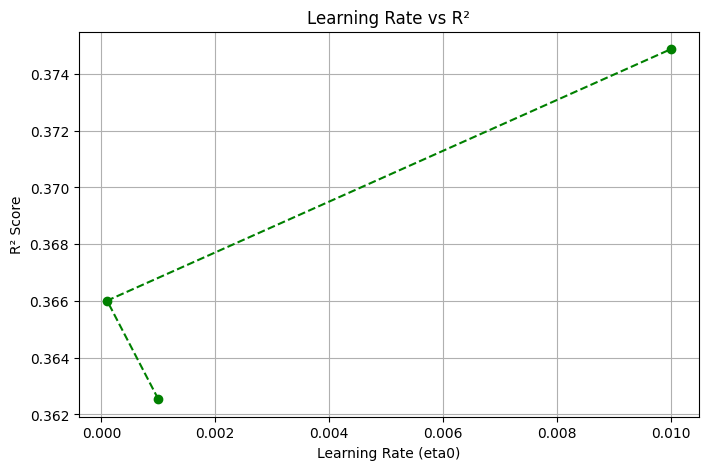

In [262]:
learning_rates = [0.001, 0.0001, 0.01]
r2_values_learning_rate = [
    0.3625362665581052,  # for eta0 = 0.001
    0.3660103839501969,  # for eta0 = 0.0001
    0.3748745124297991   # for eta0 = 0.01
]

# Plot: Learning Rate vs R²
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, r2_values_learning_rate, marker='o', linestyle='--', color='g')
plt.xlabel('Learning Rate (eta0)')
plt.ylabel('R² Score')
plt.title('Learning Rate vs R²')
plt.grid(True)
plt.show()
